## Power Analysis Exercises

Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:

1. Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done before collecting data.
1. Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.
1. Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.
1. Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.
1. To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab


In [49]:
#import libraries
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

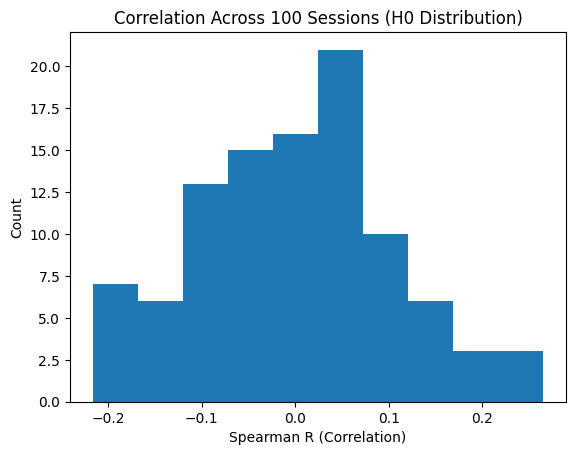

In [47]:
#simulate null distributions in a bunch of different sessions
sessions=100
spike_rate=st.poisson.rvs(2, size=(sessions,1000)) #generate poisson distribution for LC trials, mean=2
pupil=np.random.normal(0,1, size=(sessions,1000)) #pupil diameter, zscores from figure

#now get corr coeff within each session
corr_list=np.zeros(sessions) #empty array to store corrs from each sess
for ses in np.arange(sessions):
    corr_list[ses], _ = st.spearmanr(spike_rate[:,ses], pupil[:,ses]) #corr of all 1000 sims per session, drop p val

#plot for fun
plt.hist(corr_list)
plt.title('Correlation Across 100 Sessions (H0 Distribution)')
plt.xlabel('Spearman R (Correlation)')
plt.ylabel('Count')
plt.show()

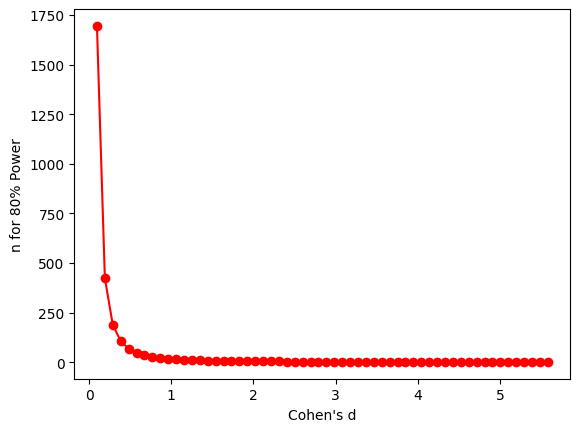

In [129]:
#ok, onto step 4 - plot how many samples we need to have 80% power (reject H0 if H0 false)
#power will depend on effect size, so we'll try a bunch of different possible ones
h1_mean=np.arange(0.01,0.59, 0.01) #let H1 be anything from very small to .6 correlation (higher -> convergence issues)

#cohen's d=(mean(H1 distribution)-mean(H0 distribution))/sd:
n=np.zeros([h1_mean.size,2])
for idx, mean in enumerate(h1_mean):
    d=(mean-0)/np.std(corr_list) #SD from H0 distribution simulated above
    size=TTestIndPower().solve_power(effect_size=d, nobs1=None, alpha=0.05, power=0.8)#get n needed for 80% power at effect size d
    n[idx]=(d, size)
    
#now that we have the list, plot:
plt.plot(n[:,0], n[:,1], 'ro-') 
plt.xlabel('Cohen\'s d')
plt.ylabel('n for 80% Power')
plt.show()